## Python for lunch 15 may

# Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### __Pandas__ works with _Series_ objects, containing data with a name, index column and single dtype

In [2]:
tdata = np.linspace(0,3600,61)
sinedata = np.sin(2*np.pi*tdata/3600)

tseries = pd.Series(tdata, name='Time [s]')
sineseries = pd.Series(sinedata, name='Sine')

tseries.head()

0      0.0
1     60.0
2    120.0
3    180.0
4    240.0
Name: Time [s], dtype: float64

Text(0.5,1,'Plotting a Pandas Series object')

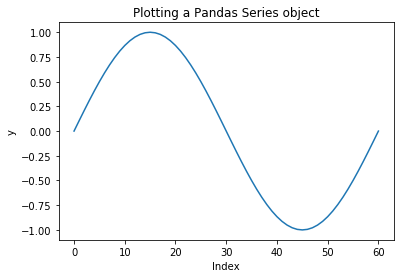

In [3]:
ax = sineseries.plot()
ax.set_xlabel('Index')
ax.set_ylabel('y')
ax.set_title('Plotting a Pandas Series object')

##### _Series_ objects support vector operations without having to loop through each element

In [4]:
tsum = tseries[1:] + tseries[:-1]
tsum.head(3)

0      NaN
1    120.0
2    240.0
Name: Time [s], dtype: float64

In [5]:
tsum.tail()

56    6720.0
57    6840.0
58    6960.0
59    7080.0
60       NaN
Name: Time [s], dtype: float64

##### Multiple Series can be combined into a 2D _DataFrame_ object

In [6]:
frame = {tseries.name: tseries, sineseries.name: sineseries}
df = pd.DataFrame(frame)
df.head()

,Time [s],Sine
0,0.0,0.000000
1,60.0,0.104528
2,120.0,0.207912
3,180.0,0.309017
4,240.0,0.406737


In [7]:
df.tail(3)

,Time [s],Sine
58,3480.0,-2.079117e-01
59,3540.0,-1.045285e-01
60,3600.0,-2.449294e-16


##### And how about multiple _DataFrames_?

In [8]:
data = {'DF 1' : pd.DataFrame(np.random.randn(4, 3)), 
   'DF 2' : pd.DataFrame(np.random.randn(4, 2))}
p = pd.Panel(data)                                       # PANel DAta (S)
print(p.minor_xs(0))
print(p.minor_xs(1))
print(p.minor_xs(2))

       DF 1      DF 2
0  0.926915 -0.807000
1  0.068217 -0.007260
2 -1.694744  0.817109
3  0.654532 -1.267546
       DF 1      DF 2
0 -0.243158  0.670520
1  1.490019 -1.455136
2  1.027623 -0.192522
3  0.456496 -1.083833
       DF 1  DF 2
0 -0.094649   NaN
1 -1.034206   NaN
2  0.066290   NaN
3  1.392579   NaN


C:\Users\jsprd\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


##### For multidimensional data you can use Xarray or multi-indexing

In [9]:
p.to_frame(False)

DF 1      DF 2
major minor                    
0     0      0.926915 -0.807000
      1     -0.243158  0.670520
      2     -0.094649       NaN
1     0      0.068217 -0.007260
      1      1.490019 -1.455136
      2     -1.034206       NaN
2     0     -1.694744  0.817109
      1      1.027623 -0.192522
      2      0.066290       NaN
3     0      0.654532 -1.267546
      1      0.456496 -1.083833
      2      1.392579       NaN

#### Indexing

In [10]:
df[56:-1]     #index slicing

,Time [s],Sine
56,3360.0,-0.406737
57,3420.0,-0.309017
58,3480.0,-0.207912
59,3540.0,-0.104528


In [11]:
df.loc[56:59,['Sine']]    #specify one column

,Sine
56,-0.406737
57,-0.309017
58,-0.207912
59,-0.104528


##### Accessing data in three (semi-)equivalent ways

In [12]:
print(df[56:-1]['Sine'].values,  
      df.loc[56:59,['Sine']].values,
      df.iloc[56:-1,1].values,
      sep='\n\n')

[-0.40673664 -0.30901699 -0.20791169 -0.10452846]

[[-0.40673664]
 [-0.30901699]
 [-0.20791169]
 [-0.10452846]]

[-0.40673664 -0.30901699 -0.20791169 -0.10452846]


In [13]:
df[df['Time [s]'] < 450]     #boolean indexing

,Time [s],Sine
0,0.0,0.000000
1,60.0,0.104528
2,120.0,0.207912
3,180.0,0.309017
4,240.0,0.406737
5,300.0,0.500000
6,360.0,0.587785
7,420.0,0.669131


#### Restructuring _DataFrames_

##### _DataFrame_ objects can be easily modified in many possible ways 

In [14]:
df['Date'] = pd.date_range('20190515123000','20190515133000',periods=61) #add column
df['Cosine'] = np.cos(2*np.pi*tdata/3600)                    #add another column
df = df.set_index('Time [s]', drop=True)                     #replace index
df = df[['Date','Sine','Cosine']]                            #reorder columns 
df.head()

,Date,Sine,Cosine
Time [s],,,
0.0,2019-05-15 12:30:00,0.000000,1.000000
60.0,2019-05-15 12:31:00,0.104528,0.994522
120.0,2019-05-15 12:32:00,0.207912,0.978148
180.0,2019-05-15 12:33:00,0.309017,0.951057
240.0,2019-05-15 12:34:00,0.406737,0.913545


##### _Concat_ is used to combine _DataFrames_ 

In [15]:
df1 = pd.DataFrame({'A':[0,1,2],'B':[2,7,2]},index=[0,1,2])
df2 = pd.DataFrame({'A':[3,4],'B':[0,0]},index=[3,4])
df3 = pd.concat([df1,df2])
print(df1,df2,df3,sep='\n\n')

   A  B
0  0  2
1  1  7
2  2  2

   A  B
3  3  0
4  4  0

   A  B
0  0  2
1  1  7
2  2  2
3  3  0
4  4  0


##### Merge 

In [16]:
df1 = pd.DataFrame({'A':[0,1],'B':[2,7]},index=[0,1])
df2 = pd.DataFrame({'B':[2,7],'C':[0,0]},index=[0,1])
df3 = pd.merge(df1,df2)
print(df1,df2,df3,'',sep='\n\n')



   A  B
0  0  2
1  1  7

   B  C
0  2  0
1  7  0

   A  B  C
0  0  2  0
1  1  7  0




##### Remove a column

In [17]:
del df3['B']             #similar to: b = df3.pop('B')   or   df3 = df3.drop(columns=['B'])
print(df3)

   A  C
0  0  0
1  1  0


#### Import/Export

In [21]:
path = 'C:/Users/jsprd/Documents/PythonForLunch/Python-for-lunch-Notebooks/PFL_11_Pandas/'
df_knmi = pd.read_csv(path+'knmi_ijmuiden.csv')
print(df_knmi)

    time_since_7-5-1976-00UTC[hr]  day  hour  dpdx[Pa/km]  dpdy[Pa/km]  \
0                             0.0  0.0   0.0     -0.81743      0.42456   
1                             1.0  0.0   1.0      0.52544      0.11659   
2                             2.0  0.0   2.0      0.23345      0.65774   
3                             3.0  0.0   3.0     -0.87598      1.62340   
4                             4.0  0.0   4.0      0.93415     -0.09569   
5                             5.0  0.0   5.0      1.57630      0.34977   
6                             6.0  0.0   6.0      2.45230     -1.27370   
7                             7.0  0.0   7.0      1.22610     -0.63684   
8                             8.0  0.0   8.0      1.16760      0.56205   
9                             9.0  0.0   9.0      0.64216      0.44546   
10                           10.0  0.0  10.0      0.40872     -0.21228   
11                           11.0  0.0  11.0      0.52544      0.11659   
12                           12.0  0.0

In [22]:
df_knmi.to_excel(path+'exceldataframe.xlsx')

#### Plotting

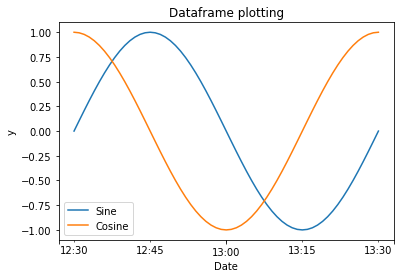

In [23]:
ax = df.plot('Date',['Sine','Cosine'])
ax.set_title('Dataframe plotting')
ax.set_ylabel('y')
plt.show()

#### Statistics

rolling mean
autocorrelationplot
data36.com pandas tutorial 1 basic reading data files dataframes data selection select user id, country and topic columns etc...
example from learnpython pandas basics

In [24]:
df.describe()

,Sine,Cosine
count,6.100000e+01,6.100000e+01
mean,-2.813074e-17,1.639344e-02
std,7.071068e-01,7.186052e-01
min,-1.000000e+00,-1.000000e+00
25%,-6.691306e-01,-6.691306e-01
50%,0.000000e+00,6.123234e-17
75%,6.691306e-01,7.431448e-01
max,1.000000e+00,1.000000e+00


In [25]:
df.corr()

,Sine,Cosine
Sine,1.000000e+00,2.532414e-17
Cosine,2.532414e-17,1.000000e+00


In [26]:
Date = df.pop('Date')
df_fourier = df.apply(np.fft.fft, axis=0)
df = df.reset_index() 
df.head()

,Time [s],Sine,Cosine
0,0.0,0.000000,1.000000
1,60.0,0.104528,0.994522
2,120.0,0.207912,0.978148
3,180.0,0.309017,0.951057
4,240.0,0.406737,0.913545


In [27]:
df_fourier.insert(0,'Frequency [Hz]',np.fft.fftfreq(len(df_fourier),60))
df_fourier.head()

,Frequency [Hz],Sine,Cosine
Time [s],,,
0.0,0.000000,(2.7755575615628914e-16+0j),(0.9999999999999947+0j)
60.0,0.000273,(1.5563914215279864-30.193577784332277j),(30.697717453783213+1.5823783602866173j)
120.0,0.000546,(-0.07053980207487168+0.6824085965244752j),(-0.34597960531593475-0.035763519107504256j)
180.0,0.000820,(-0.05909958025046402+0.3794617003862681j),(-0.12768716894647447-0.019886745040211283j)
240.0,0.001093,(-0.055925237487294915+0.26762250654058184j),(-0.06711710078877231-0.014025501253953956j)


C:\Users\jsprd\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


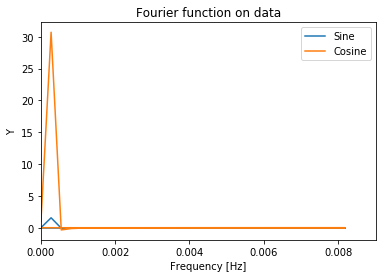

In [28]:
ax = df_fourier.plot('Frequency [Hz]', ['Sine','Cosine'], use_index=True)
ax.set_title('Fourier function on data')
ax.set_ylabel('Y')
ax.set_xlim(left=0)
plt.show()

#### Exercise

On the _Python For Lunch_ Github page you can find a file named 'population.csv', in which the yearly population for many regions is shown. We can perform a small analysis using Pandas.
1) Make a plot of the Dutch population for all available years.
2) Create a _DataFrame_ consisting of the time series for the Netherlands, France, China and Burundi (Country Codes: _NLD, FRA, CHN and BDI_). Compute the relative increase for all countries (yearly increase divided by population, you can use for example _DataFrame.diff()_). The relative increase time series can be compared among countries. Make a table of the correlation coefficients.